# NN 모델

In [1]:
import pandas as pd
import numpy as np

kor_df = pd.read_csv("/content/lan_dataset.csv")
na_df = pd.read_csv("/content/na_dataset.csv")
kor_df.head()


,Blue Mastery 1,Blue Mastery 2,Blue Mastery 3,Blue Mastery 4,Blue Mastery 5,Blue Masteries Avg,Blue Masteries Median,Blue Masteries Kurtorsis,Blue Masteries Skewness,Blue Masteries Std,...,Red Winrate 3,Red Winrate 4,Red Winrate 5,Red Winrates Avg,Red Winrates Median,Red Winrates Kurtorsis,Red Winrates Skewness,Red Winrates Std,Red Winrates Variance,Blue Won
0,302361,32548,137831,42344,2594552,621927.2,137831.0,4.804286,2.183943,991060.524461,...,0.485714,0.333333,0.588384,0.511934,0.552239,1.755027,-1.441162,0.097786,0.009562,0
1,244724,55894,166393,151398,17928,127267.4,151398.0,-1.336965,0.013165,81189.183929,...,0.551136,0.641509,0.500000,0.589079,0.551136,-0.950929,0.766032,0.077926,0.006073,0
2,1370461,165699,328554,11922,64623,388251.8,165699.0,4.066366,1.991324,502829.634615,...,0.631579,0.535714,0.529412,0.580125,0.535714,-0.171439,0.832254,0.092372,0.008533,0
3,859153,8207,152833,30736,94462,229078.2,94462.0,4.494974,2.098720,319077.677286,...,0.142857,0.515789,0.523632,0.336456,0.500000,-2.252575,-0.789161,0.221190,0.048925,1
4,295938,326564,1812645,64742,83541,516686.0,295938.0,4.480466,2.090117,656696.848512,...,0.565284,0.600000,0.416667,0.547907,0.565284,-1.091492,0.001576,0.094206,0.008875,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
kor_dataset = kor_df.to_numpy()
na_dataset = na_df.to_numpy()

np.random.shuffle(kor_dataset)
np.random.shuffle(na_dataset)
#마지막 특성이 승리 여부(라벨)
x_train = kor_dataset[:, 0:44]
y_train = kor_dataset[:, 44]

x_test = na_dataset[:, 0:44]
y_test = na_dataset[:, 44]


print(f"x_train size: {len(x_train)}")
print(f"y_train size: {len(y_train)}")


print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")


x_train size: 12458
y_train size: 12458
x_test size: 4552
y_test size: 4552


In [9]:
from keras.initializers import HeNormal
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# 롤 모델 훈련 구조 생성
initializer = HeNormal()
model = Sequential(
    [
        Dropout(0.1, input_dim=44),
        BatchNormalization(),
        Dense(160, activation="elu", kernel_initializer=initializer),
        Dropout(0.1),
        BatchNormalization(),
        Dense(128, activation="elu", kernel_initializer=initializer),
        Dropout(0.1),
        BatchNormalization(),
        Dense(64, activation="elu", kernel_initializer=initializer),
        Dropout(0.1),
        BatchNormalization(),
        Dense(32, activation="elu", kernel_initializer=initializer),
        Dropout(0.1),
        BatchNormalization(),
        Dense(16, activation="elu", kernel_initializer=initializer),
        Dense(1, activation="sigmoid"),
    ]
)
#손실함수로는 이진 분류에 사용되는 binary_crossentropy를 사용했고 Optimizer은 RMSProp과 Momentum의 장점을 합친 adam으로 선택
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


batch_size는 보편적으로 16, 64, 128, 256을 많이 사용하는데 데이터가 많아 256으로 선택했고,
에포크는 훈련 데이터 수 / 배치 사이즈 =49로 했는데 결과가 제일 좋아 선택

In [10]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=49,batch_size=256
)


Epoch 1/49
49/49 [==============================] - 5s 22ms/step - loss: 0.4287 - accuracy: 0.8000 - val_loss: 0.4253 - val_accuracy: 0.8003
Epoch 2/49
49/49 [==============================] - 1s 16ms/step - loss: 0.3522 - accuracy: 0.8430 - val_loss: 0.3659 - val_accuracy: 0.8350
Epoch 3/49
49/49 [==============================] - 1s 17ms/step - loss: 0.3429 - accuracy: 0.8452 - val_loss: 0.3398 - val_accuracy: 0.8473
Epoch 4/49
49/49 [==============================] - 1s 15ms/step - loss: 0.3296 - accuracy: 0.8523 - val_loss: 0.3192 - val_accuracy: 0.8634
Epoch 5/49
49/49 [==============================] - 1s 15ms/step - loss: 0.3201 - accuracy: 0.8574 - val_loss: 0.3036 - val_accuracy: 0.8649
Epoch 6/49
49/49 [==============================] - 1s 16ms/step - loss: 0.3062 - accuracy: 0.8632 - val_loss: 0.2867 - val_accuracy: 0.8741
Epoch 7/49
49/49 [==============================] - 1s 17ms/step - loss: 0.2920 - accuracy: 0.8728 - val_loss: 0.2762 - val_accuracy: 0.8792
Epoch 8/49
49

In [11]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy: {:.2f}%".format(train_acc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc * 100))


Train Accuracy: 90.66%
Test Accuracy: 87.92%


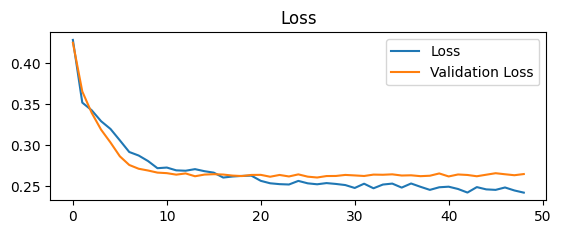

In [12]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title("Loss")
pyplot.plot(history.history["loss"], label="Loss")
pyplot.plot(history.history["val_loss"], label="Validation Loss")
pyplot.legend()
pyplot.show()


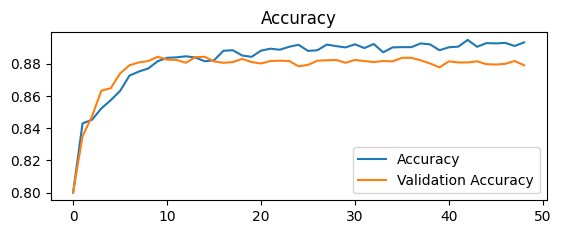

In [13]:
pyplot.subplot(212)
pyplot.title("Accuracy")
pyplot.plot(history.history["accuracy"], label="Accuracy")
pyplot.plot(history.history["val_accuracy"], label="Validation Accuracy")
pyplot.legend()
pyplot.show()


조금 과소적합 같지만 손실곡선과 학습 곡선을 그려보니 좋은 그림이 나와 최종 모델로 선택